In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

In [3]:
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


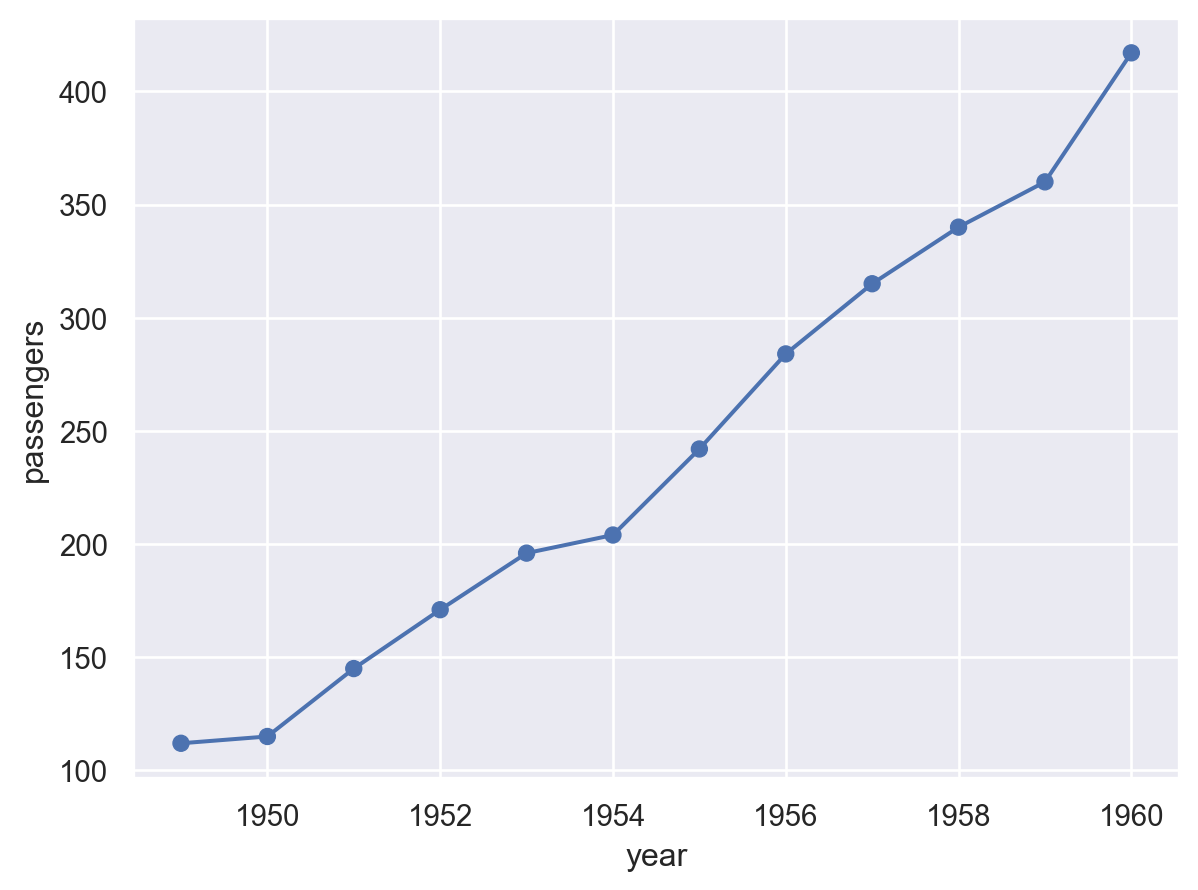

In [6]:
# Graficamos la curva cantidad de pasajeros en enero de cada año
vuelosEnero = flights[flights.month == "Jan"]
(
    so.Plot(data = vuelosEnero, x = "year", y = "passengers")
    .add(so.Line())
    .add(so.Dot())
)

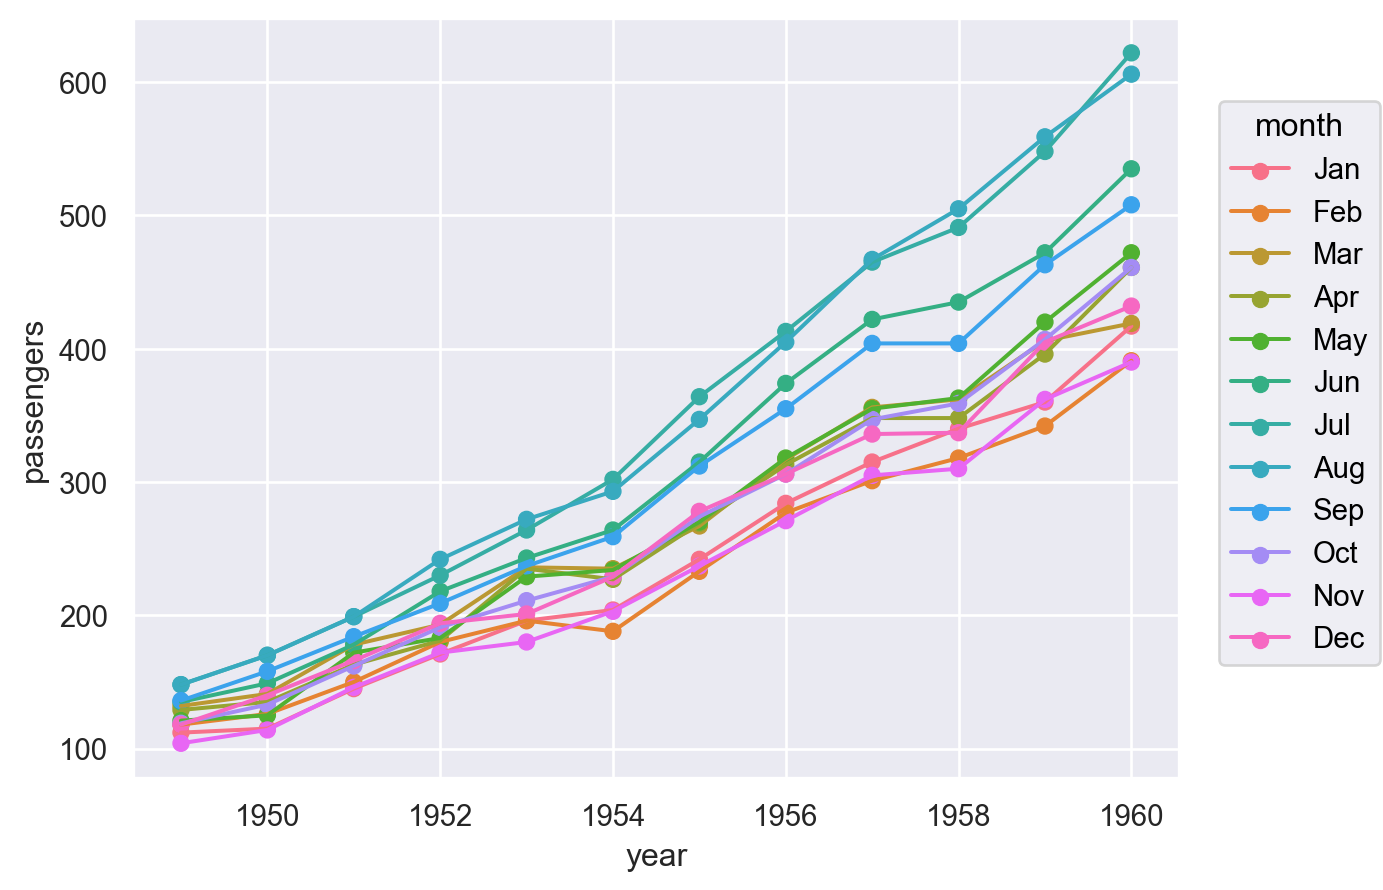

In [8]:
#Para poder referirnos a todos los meses y no solo enero, usamos todo el dataframe pero codificamos otro canal!
(
    so.Plot(data = flights, x = "year", y = "passengers", color = "month")
    .add(so.Dot())
    .add(so.Line())
)

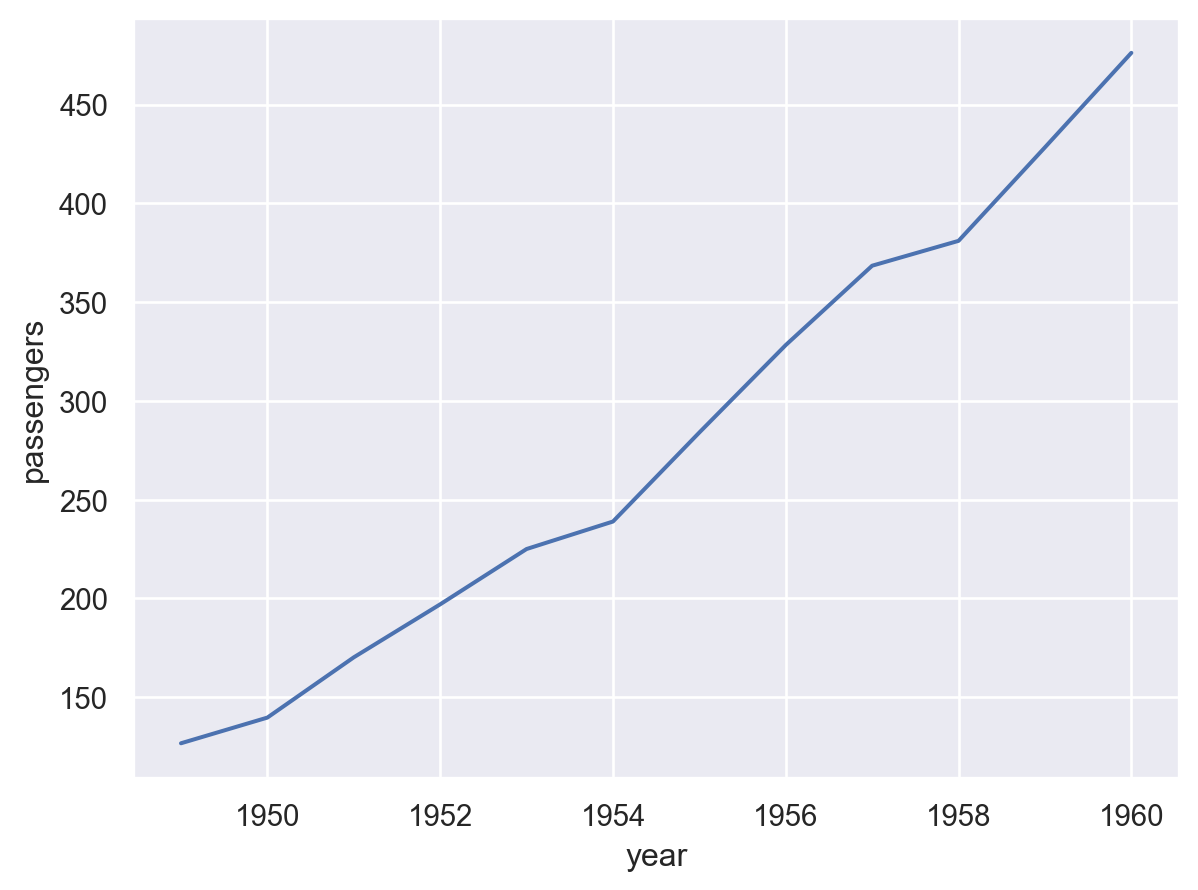

In [9]:
# Opción 2: agregamos los datos por mes
# Podemos calcularlos previamente utilizando lo que vimos en la práctica 2 (groupby(), sum(), ...)
# o usamos una función para agregar los datos.
(
    so.Plot(data = flights, x = "year", y = "passengers")
    .add(so.Line(), so.Agg("mean"))
    #.add(so.Dot(), so.Agg("mean")) podemos agreggate metodos de pandas
)

In [11]:
"""al agregar codificaciones podemos hacer que mapee en todas las capas (la de la clase so.Plot), o en una 
marca especifica que es lo que permite el so.add
lo mismo que si asignamos un parametro corte color rojo, no codificamos dato sino que asignamos un valor para distinguir"""


'al agregar codificaciones podemos hacer que mapee en todas las capas (la de la clase so.Plot), o en una \nmarca especifica que es lo que permite el so.add\nlo mismo que si asignamos un parametro corte color rojo, no codificamos dato sino que asignamos un valor para distinguir'

In [1]:
#so.Plot(data = flights, x = "year", y = "passengers", color = "red")
"""da error pues no estamos codificando algun dato, sino un valor para representar el canal color"""

'da error pues no estamos codificando algun dato, sino un valor para representar el canal color'

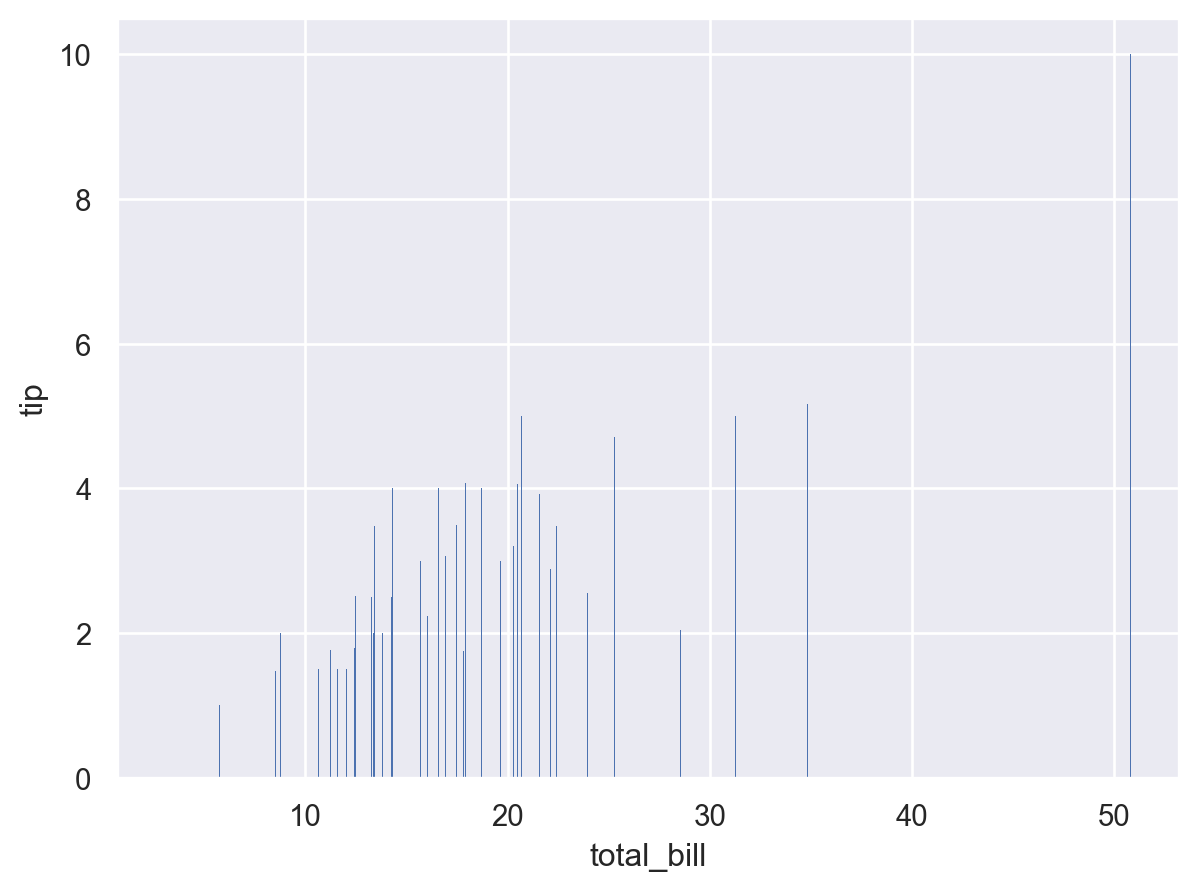

In [13]:
tips = sns.load_dataset("tips")
(
    so.Plot(tips, "total_bill", "tip")
    .add(so.Bar())
)

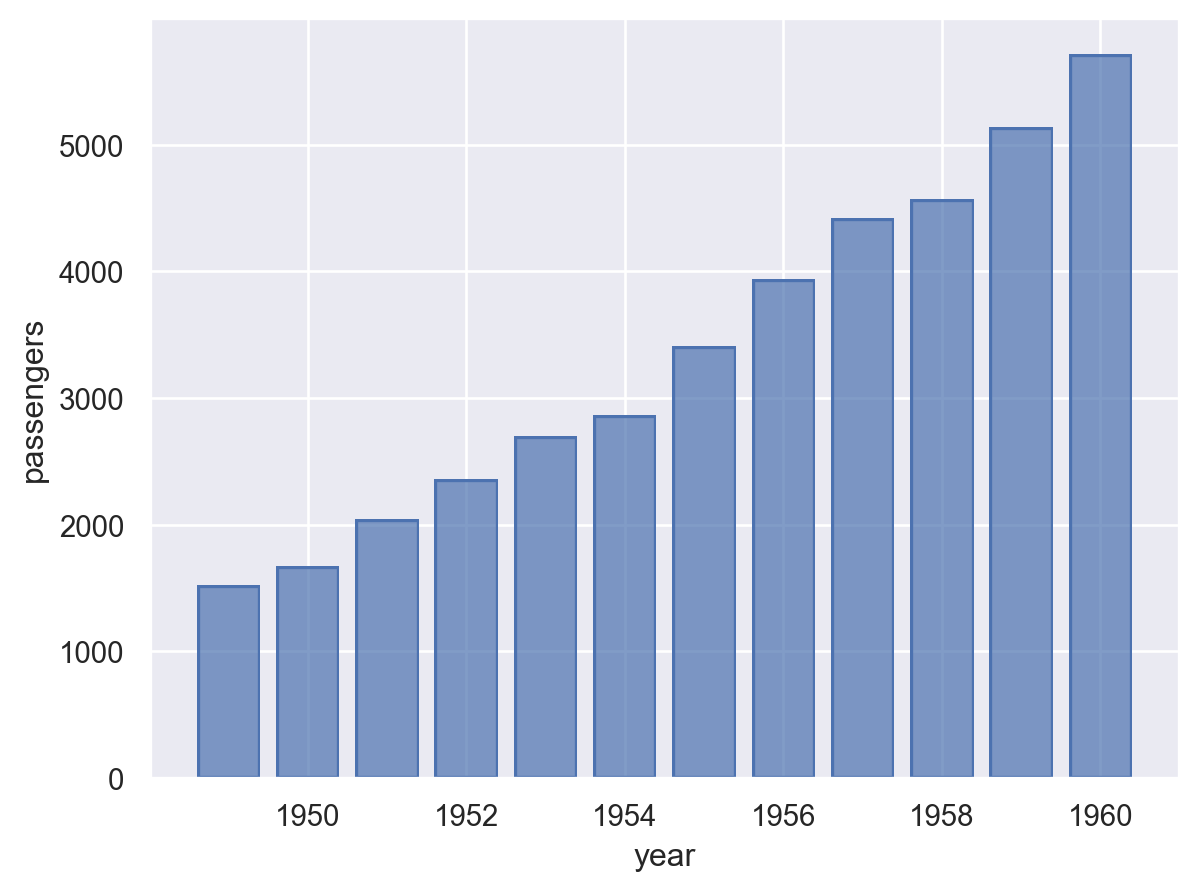

In [14]:
"""uso de barras"""
# La variable x puede también corresponder a valores numéricos discretos.
# Graficamos la cantidad total de vuelos por año.
(
    so.Plot(data = flights, x = "year", y = "passengers")
    .add(so.Bar(), so.Agg("sum"))
)

In [3]:
penguins = sns.load_dataset("penguins")
#serie panda agrupando con funciones a pinguinos por isla =
pinguinos_por_isla1 = penguins.groupby("island").size()


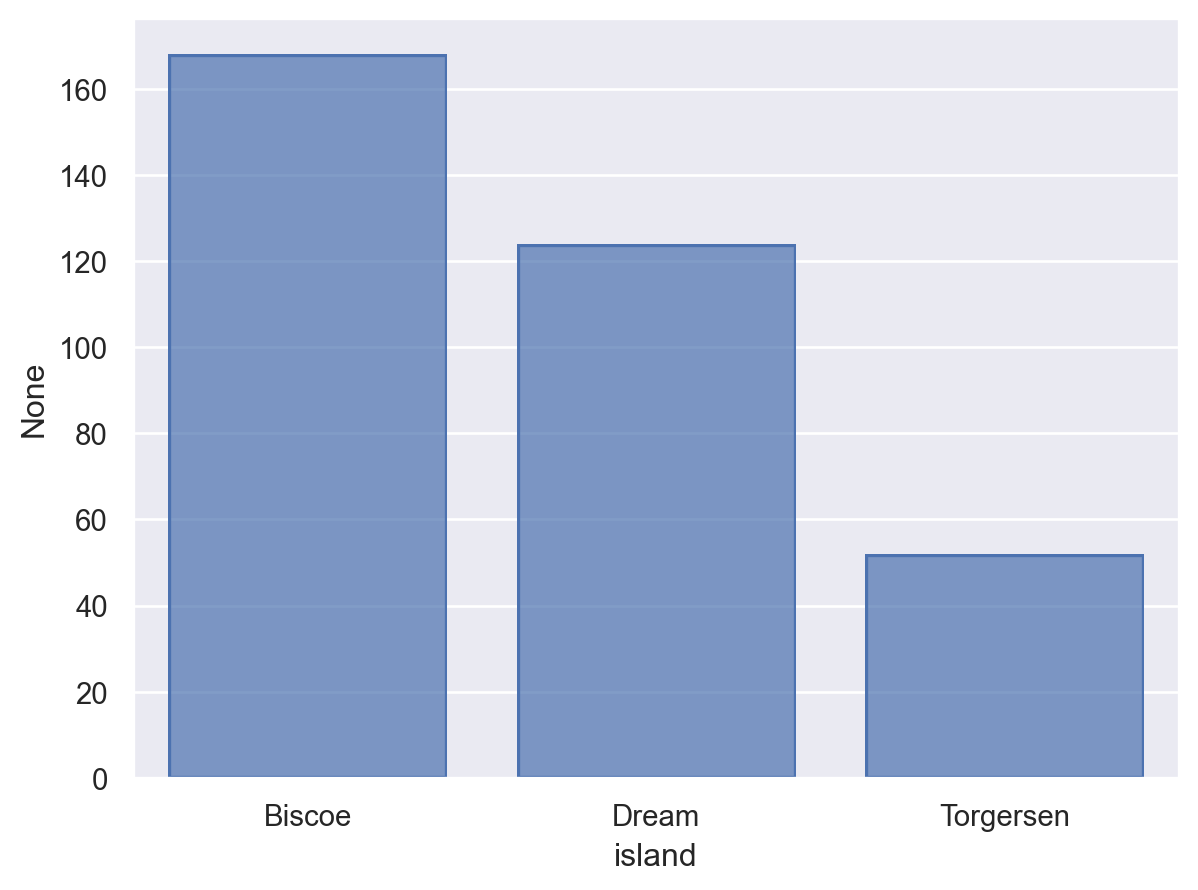

In [22]:
# Pero podemos indicar series para x e y, y no especificar ninguna DataFrame
(
    so.Plot(x = pinguinos_por_isla1.index, y = pinguinos_por_isla1)
    .add(so.Bar())
)

In [23]:
"""¿Podemos usar so.Plot() sin un DataFrame?
Sí, no necesariamente tenemos que indicar data, x e y al definir el Plot().
Podemos usar series de Pandas o arrays para x e y."""


'¿Podemos usar so.Plot() sin un DataFrame?\nSí, no necesariamente tenemos que indicar data, x e y al definir el Plot().\nPodemos usar series de Pandas o arrays para x e y.'

In [ ]:
"""# Si queremos cantidad promedio de vuelos con vuelos en enero...
pasajerosEnero = flights[flights["month"] == "Jan"]["passengers"]
(
    so.Plot(data = flights, x = "year", y= pasajerosEnero)
    .add(so.Line(), so.Agg("mean")) # Promedio anual de pasajeros por mes
    .add(so.Line(color = "red"), so.Agg("sum")) # Pasajeros en enero
)
?"""

In [17]:
#dowjones = sns.load_dataset("dowjones")
#dowjones.head()

In [2]:
"""Los histogramas nos sirven para analizar la distribución de valores observados de una variable.
Para histogramas, 
(el metodo nos dice cuantas barras queremos agregar"""

'Los histogramas nos sirven para analizar la distribución de valores observados de una variable.\nPara histogramas, \n(el metodo nos dice cuantas barras queremos agregar'

,country,continent,year,lifeExp,pop,gdpPercap
48,Argentina,Americas,1952,62.485,17876956,5911.315053
49,Argentina,Americas,1957,64.399,19610538,6856.856212
50,Argentina,Americas,1962,65.142,21283783,7133.166023
51,Argentina,Americas,1967,65.634,22934225,8052.953021
52,Argentina,Americas,1972,67.065,24779799,9443.038526
53,Argentina,Americas,1977,68.481,26983828,10079.026740
54,Argentina,Americas,1982,69.942,29341374,8997.897412
55,Argentina,Americas,1987,70.774,31620918,9139.671389
56,Argentina,Americas,1992,71.868,33958947,9308.418710
57,Argentina,Americas,1997,73.275,36203463,10967.281950


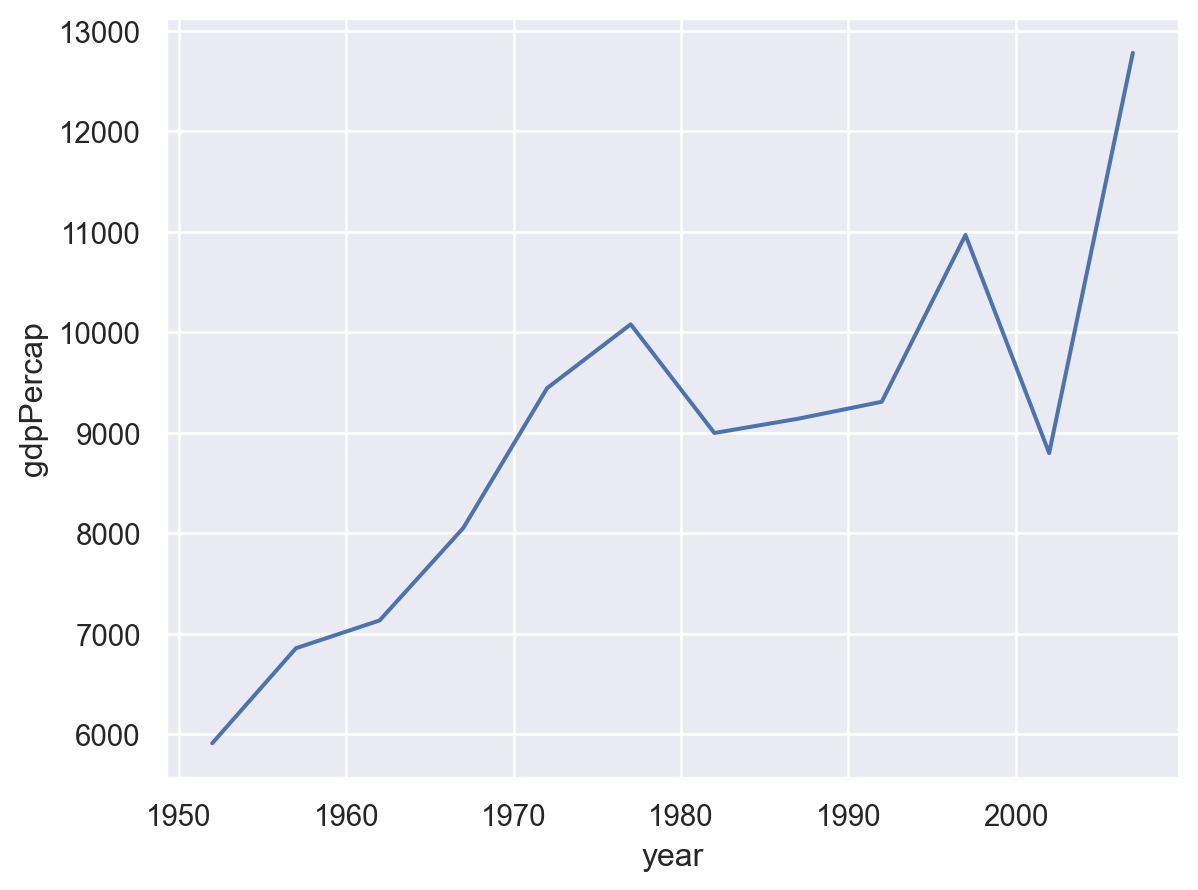

In [16]:
#### GUIA 3 ####
from gapminder import gapminder
datosArgentina = gapminder[gapminder["country"]=="Argentina"] 
display(datosArgentina)
(
    so.Plot(data = datosArgentina, x = "year", y = "gdpPercap")
           .add(so.Line())

)

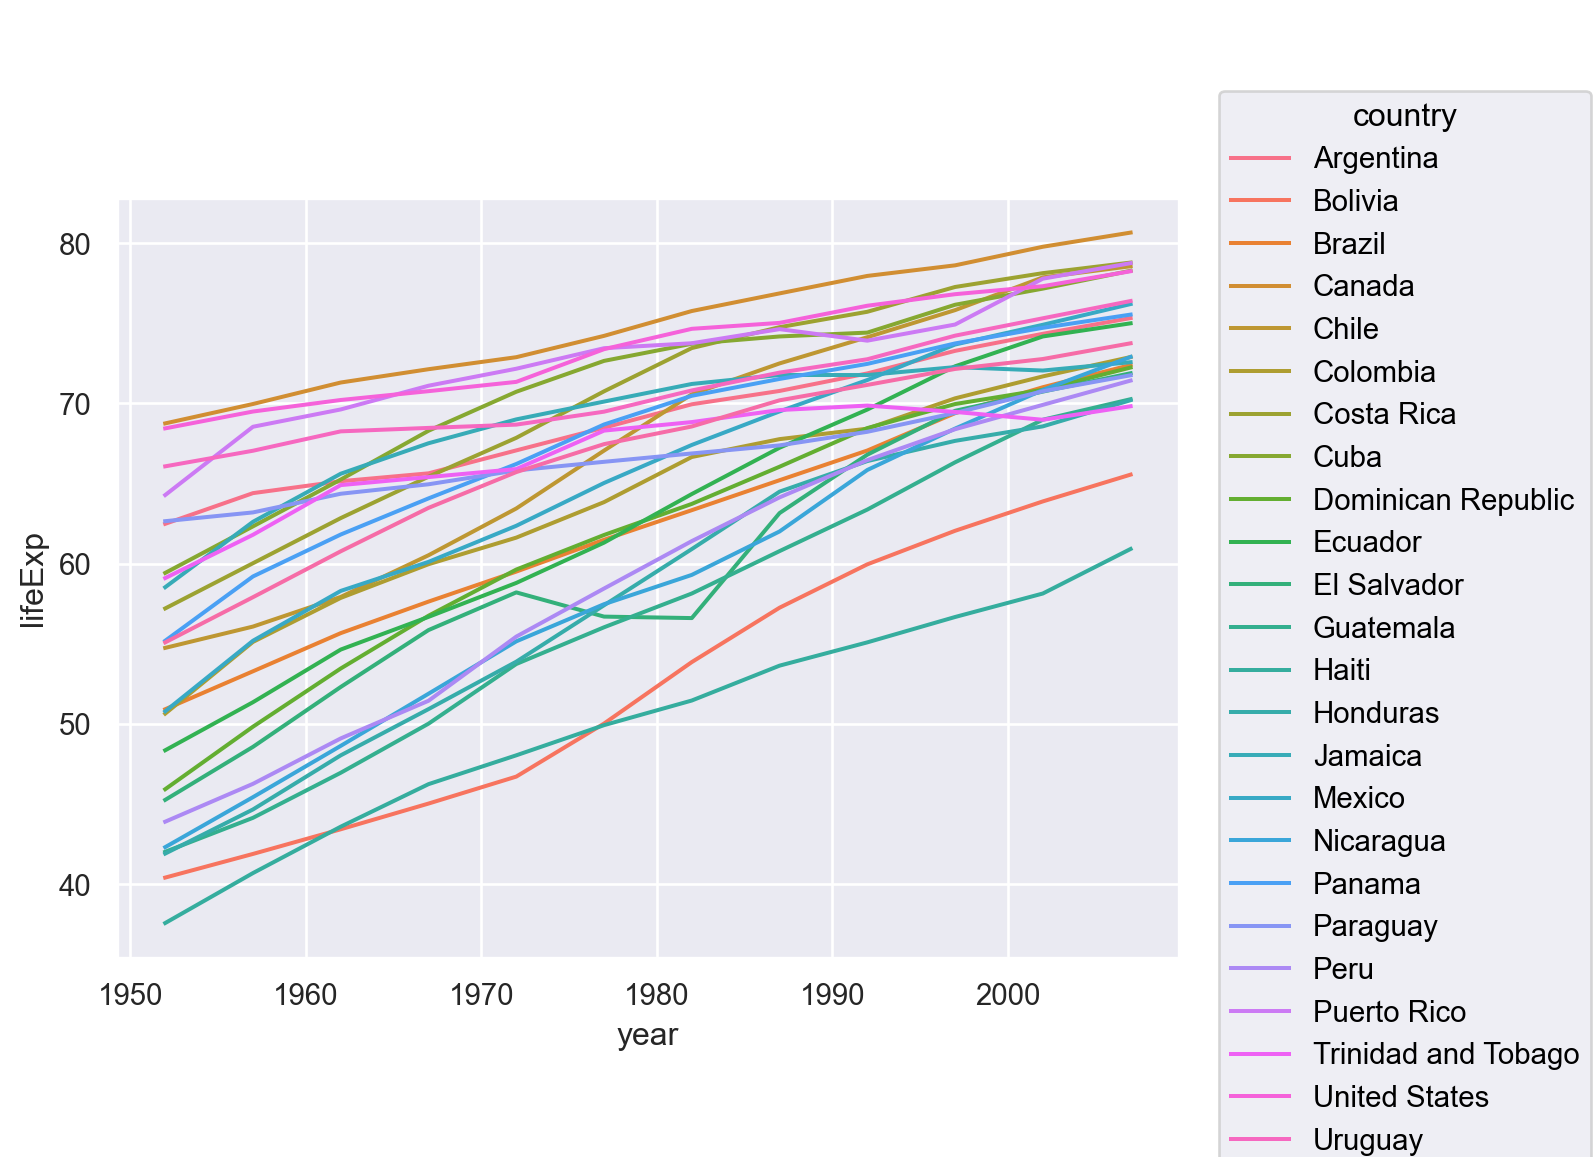

In [26]:
datosAmericas = gapminder[gapminder["continent"].isin(["Americas"])]

(so.Plot(
    data = datosAmericas , x = "year" , y = "lifeExp" , color = "country", group = "country")
         .add(so.Lines())
)

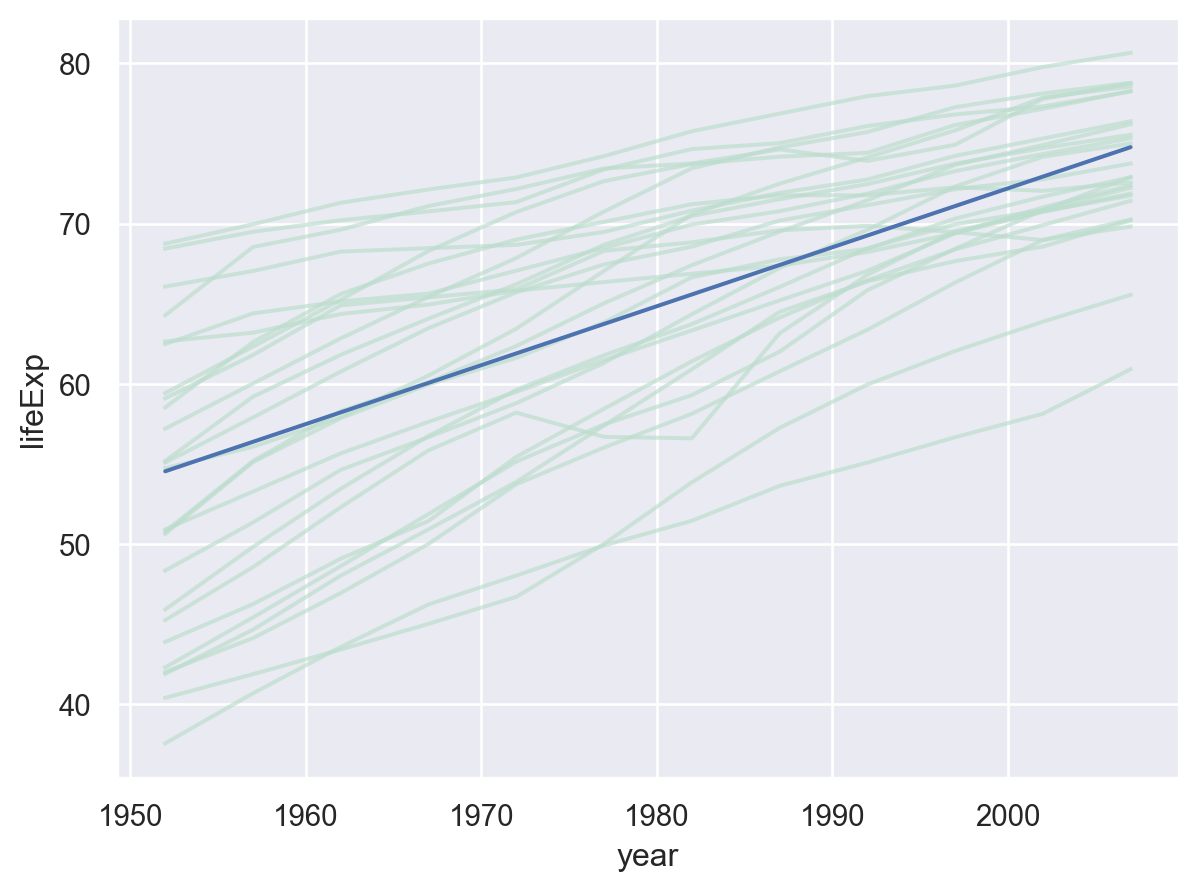

In [42]:
(so.Plot (data = datosAmericas , x = "year" , y = "lifeExp")
.add(so.Lines ( color = "#bdca") , group = "country") #la codificacion la hicimos sobre una marca al parecer xd y no en todo la capa general
.add(so.Line (), so.PolyFit(1) )
)

In [43]:
#hacer punto 1-d

In [27]:
#2
penguins = sns.load_dataset("penguins")
#penguins.shape
"""hay 344 filas y 7 columnas!"""
penguins.info

<bound method DataFrame.info of     species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1

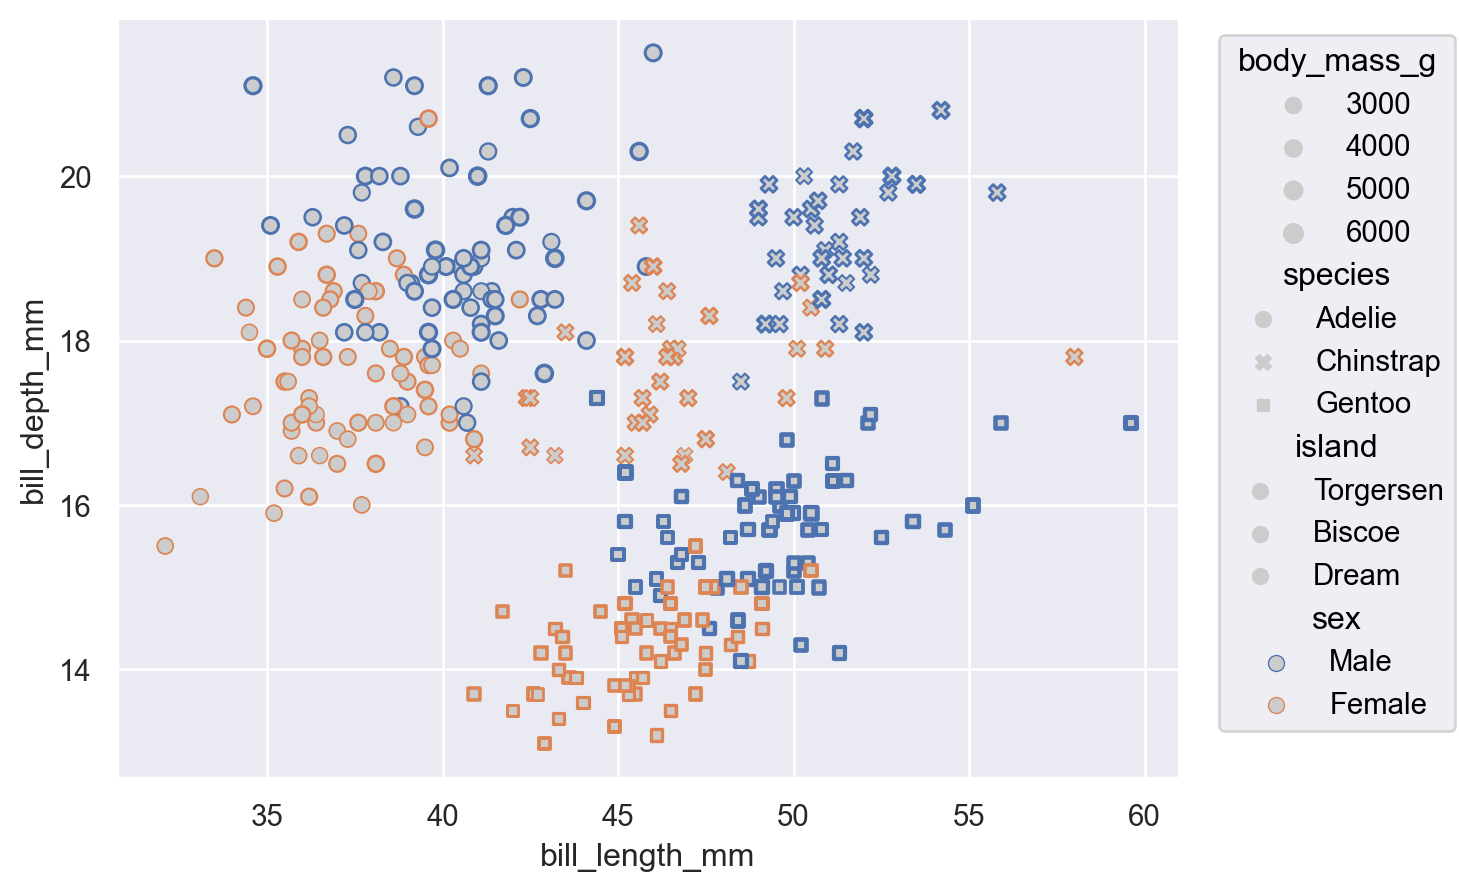

In [47]:
#3
"""¿Qu´e resultado esperan para el siguiente gr´afico? ¿Cu´ales codificaciones se pasan de Plot()
a Dot() y cu´ales no pueden pasarse? ¿Cu´ales codificaciones se establecen en Dot()? ¿Cu´ales
variables est´an asignadas directamente en Dot()? ¿De qu´e color van a pintarse los puntos? """
(
    so.Plot( penguins , x = "bill_length_mm", y = "bill_depth_mm",
        edgewidth = "body_mass_g" , marker = "species",
            linestyle = "island", color = "species" )
        .add(so.Dot( color = ".8" ) , edgecolor = "sex" )
)
"""indagar la documentacion de cada marca"""

<Axes: xlabel='bill_depth_mm', ylabel='bill_length_mm'>

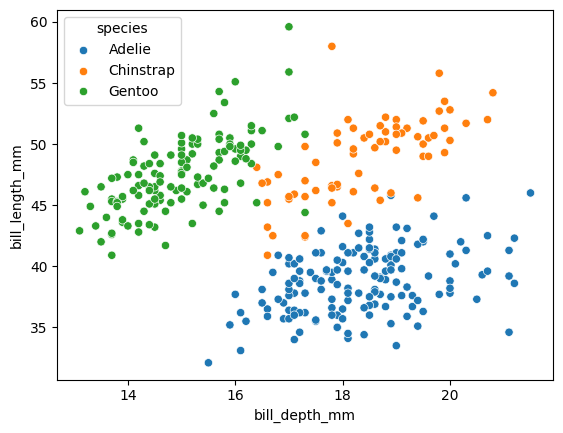

In [85]:
#4
"""(a)Hacer un grafico de dispersion de bill_depth_mm (en el eje x) vs. bill_length_mm (en el eje y)."""
(sns.scatterplot( data = penguins , x = "bill_depth_mm" , y = "bill_length_mm", hue = "species"))

<Axes: xlabel='bill_depth_mm', ylabel='bill_length_mm'>

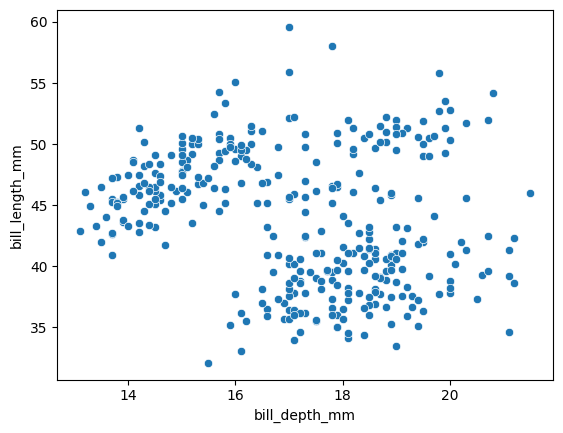

In [86]:
#sin distincion de secsooo
(sns.scatterplot( data = penguins , x = "bill_depth_mm" , y = "bill_length_mm")))

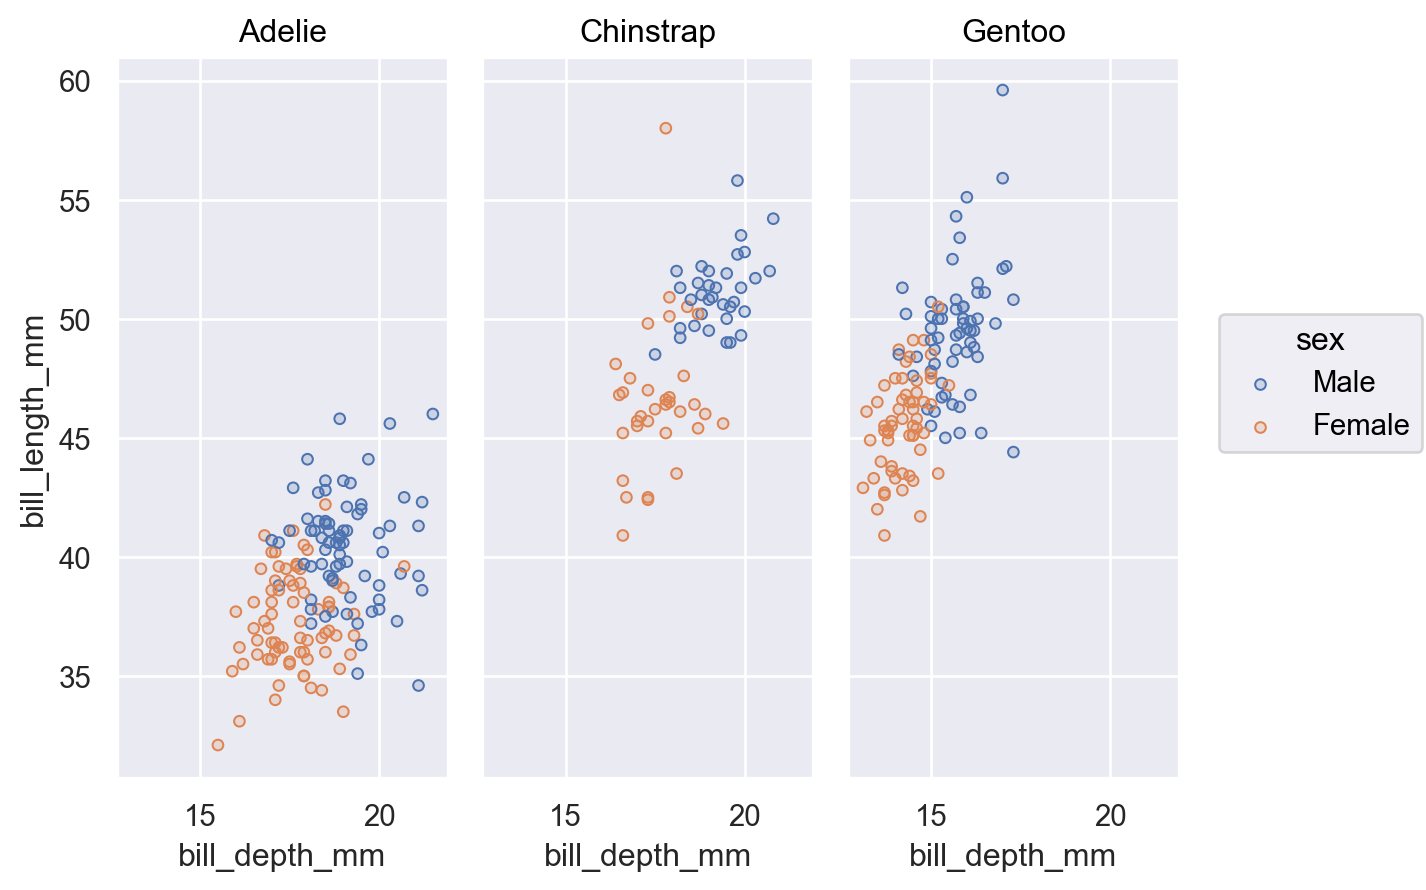

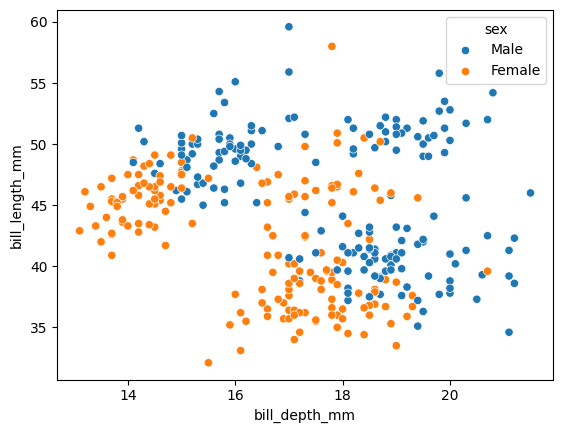

In [87]:
# 5 
#a
scatter = (sns.scatterplot(data = penguins , x = "bill_depth_mm" , y = "bill_length_mm", hue = "sex"))

#(b) Usando la funcion facet() separar el grafico del item anterior en tres subgraficos, uno para cada especie.
"""
#scatter.facet("species")
#(sns.scatterplot(data = penguins , x = "bill_depth_mm" , y = "bill_length_mm", hue = "sex", facet_col = "species"))
"""
p = so.Plot(penguins, x = "bill_depth_mm", y = "bill_length_mm").add(so.Dots() , color = "sex")
p.facet("species")

In [28]:
#6
"""¿Cuantos pinguinos hay en cada isla en la base de datos? Recordar los comandos groupby
() y size() de la practica anterior."""

#penguins.groupby("island").unique()
# penguins.groupby("island")["species"].size() == penguins.groupby("island").size()
penguins.groupby("island").size()

island
Biscoe       168
Dream        124
Torgersen     52
dtype: int64

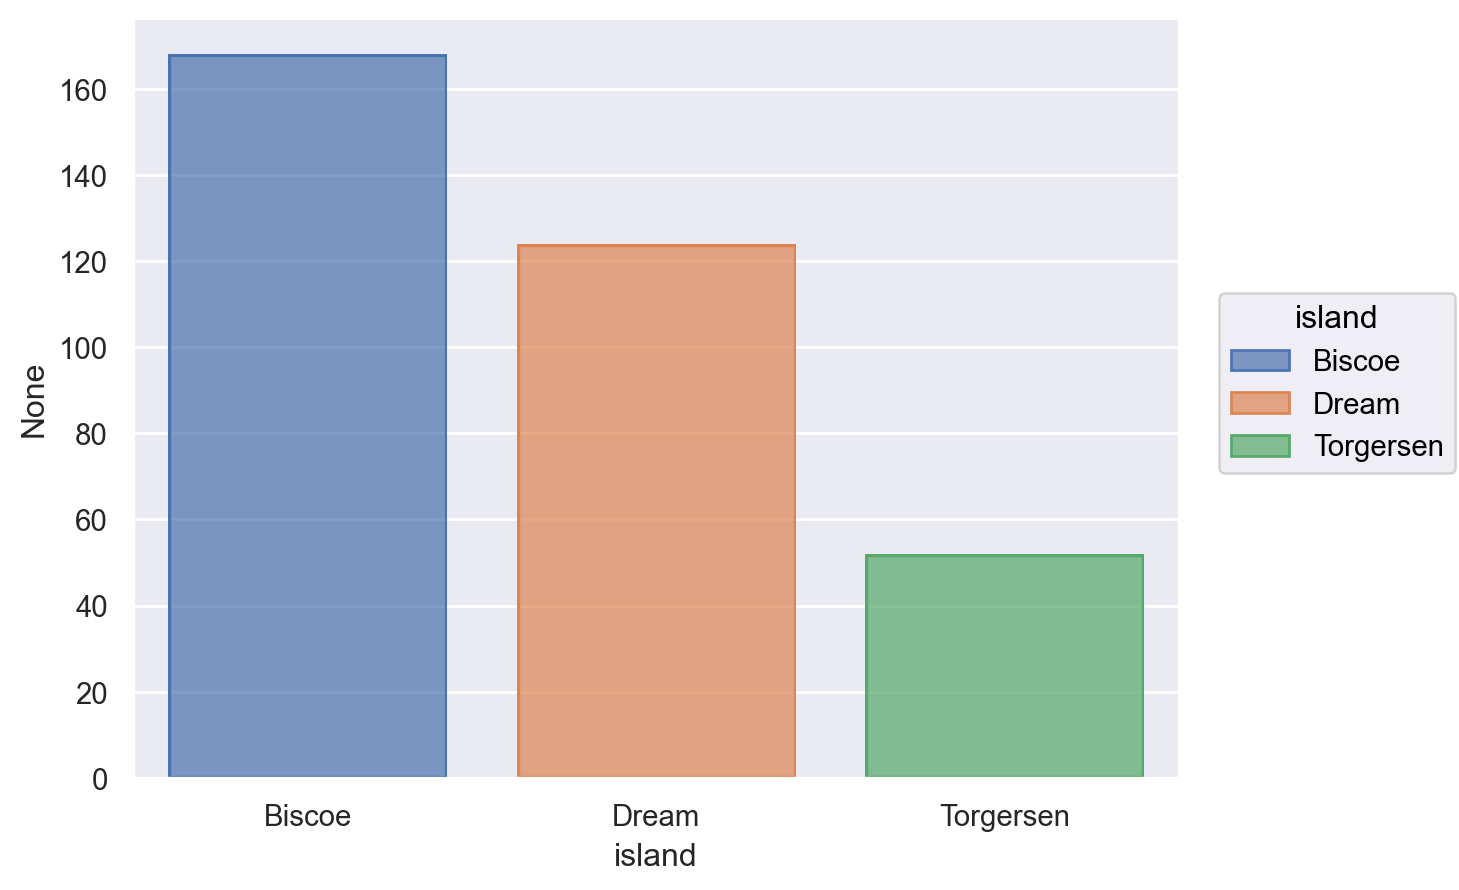

In [34]:
#b)
"""Realizar un grafico de barras con la cantidad de ping¨unos en cada isla, completando el
siguiente c´odigo."""
pinguinos_por_isla = penguins.groupby("island").size()

(
    so.Plot( x = pinguinos_por_isla.index, y = pinguinos_por_isla , color = pinguinos_por_isla.index #agregado por mi xd)
        .add(so.Bar())
)

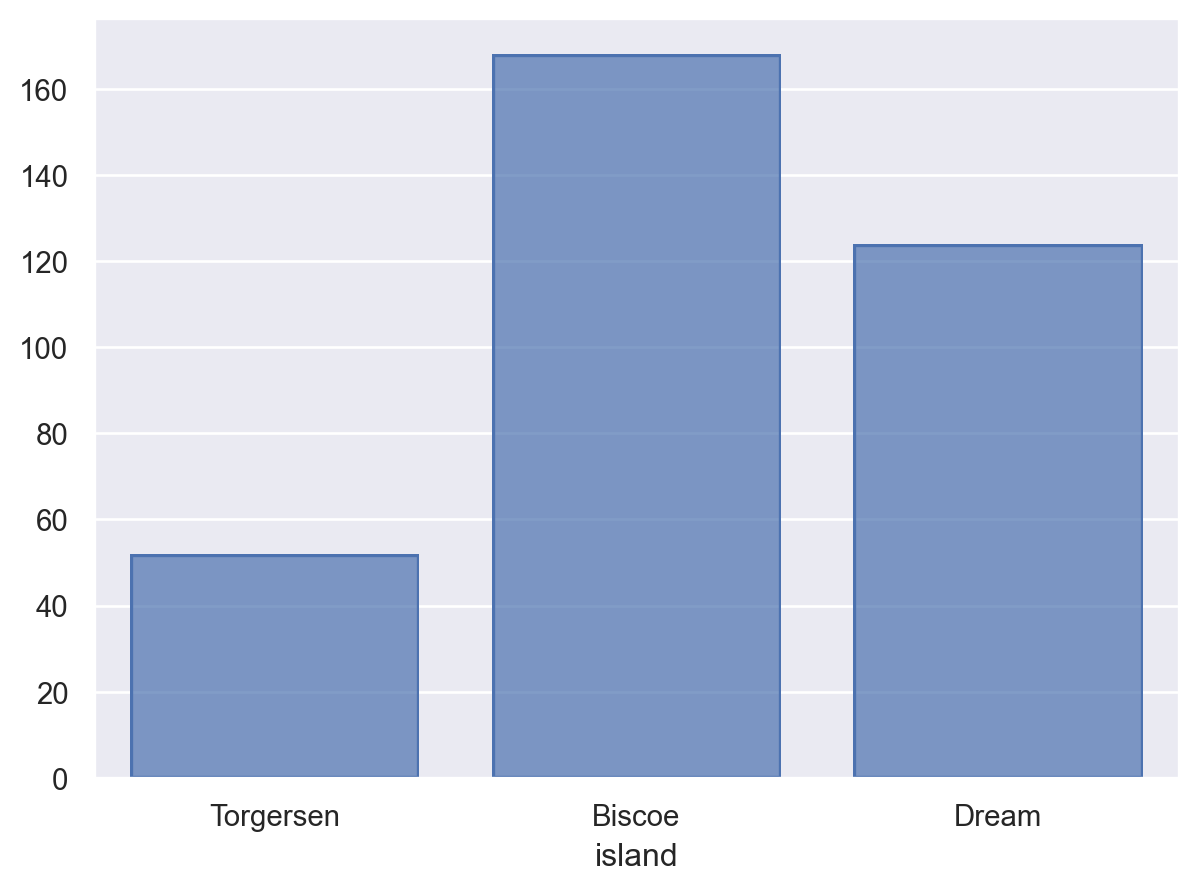

In [35]:
"""Cuando tenemos todos los datos individuales, podemos agregarlos para hacer un gráfico de barras usando el método hist."""
#c
"""El grafico que acabamos de hacer es un histograma categorico (usamos una variable
categorica en el eje X). Podemos realizar el mismo grafico usando la funcion Hist()
para contar automaticamente las cantidades (sin definir una variable pinguinos_por_isla.
Completar el siguiente codigo."""

(
    so .Plot( data = penguins , x = "island"  )
        .add(so.Bar() , so.Hist() )
)

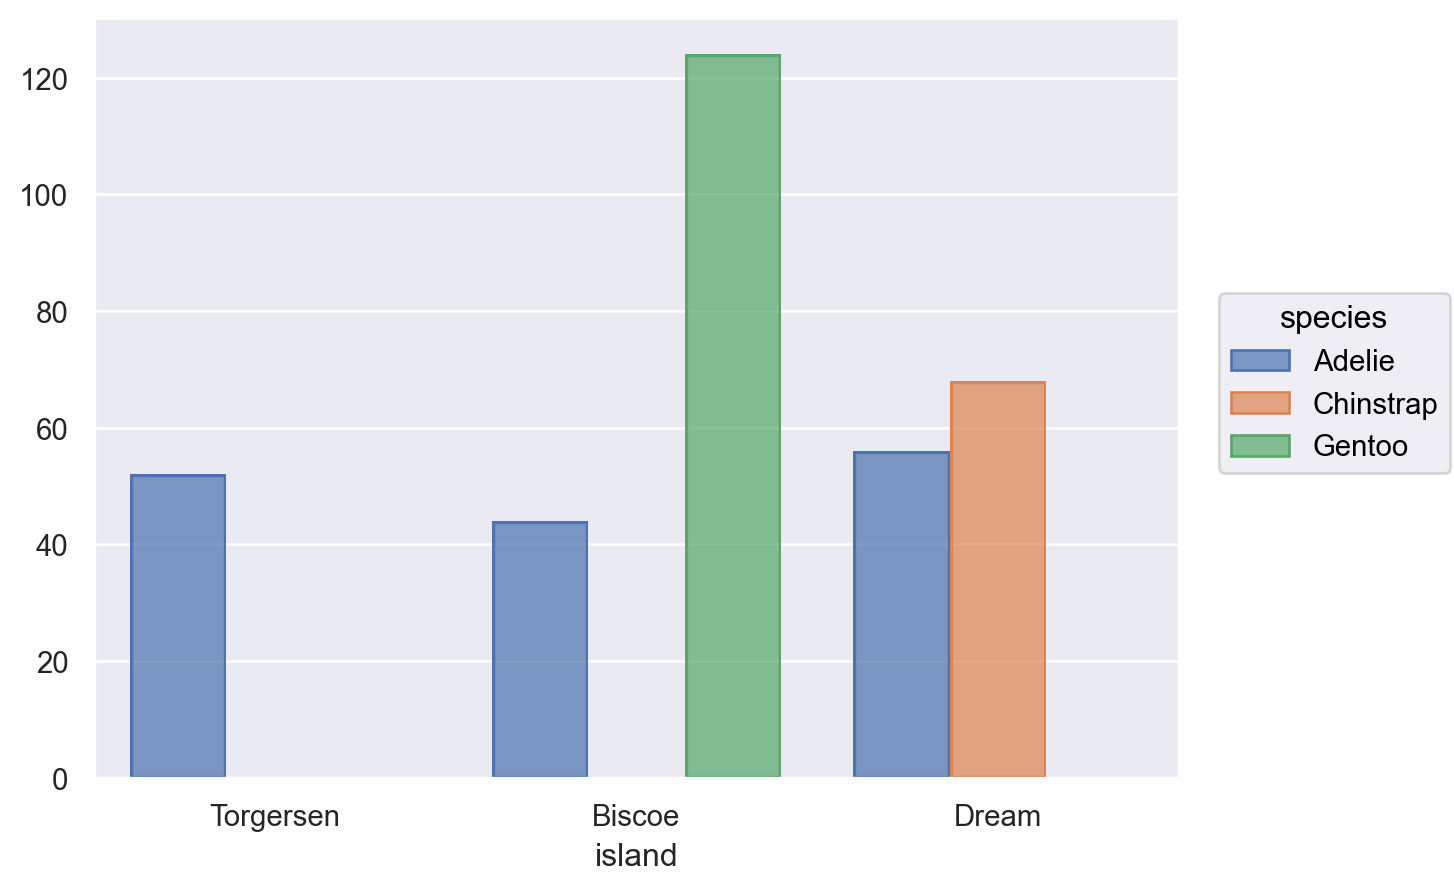

In [42]:
#e)
"""Queremos ver en un grafico cuantos pinguinos de cada especie hay en cada isla, ¿como
podemos hacerlo? Si usan un grafico de barras, pueden utilizar la funcion dodge() para
hacer varias barras por categorıa."""
(
    so.Plot( data = penguins , x = "island" ) #puedo codificarlo para que mapee en todas las capas tambien.
        .add(so.Bar() , so.Hist() , so.Dodge() , color = "species")
        
    )
#para que haga la diferencia tuve que que categorizar un parametro mas, en este caso especies es el que necesitabamos diferenciar.

In [ ]:
#(f) ¿C´omo podr´ıan visualizar lo mismo usando facet()?

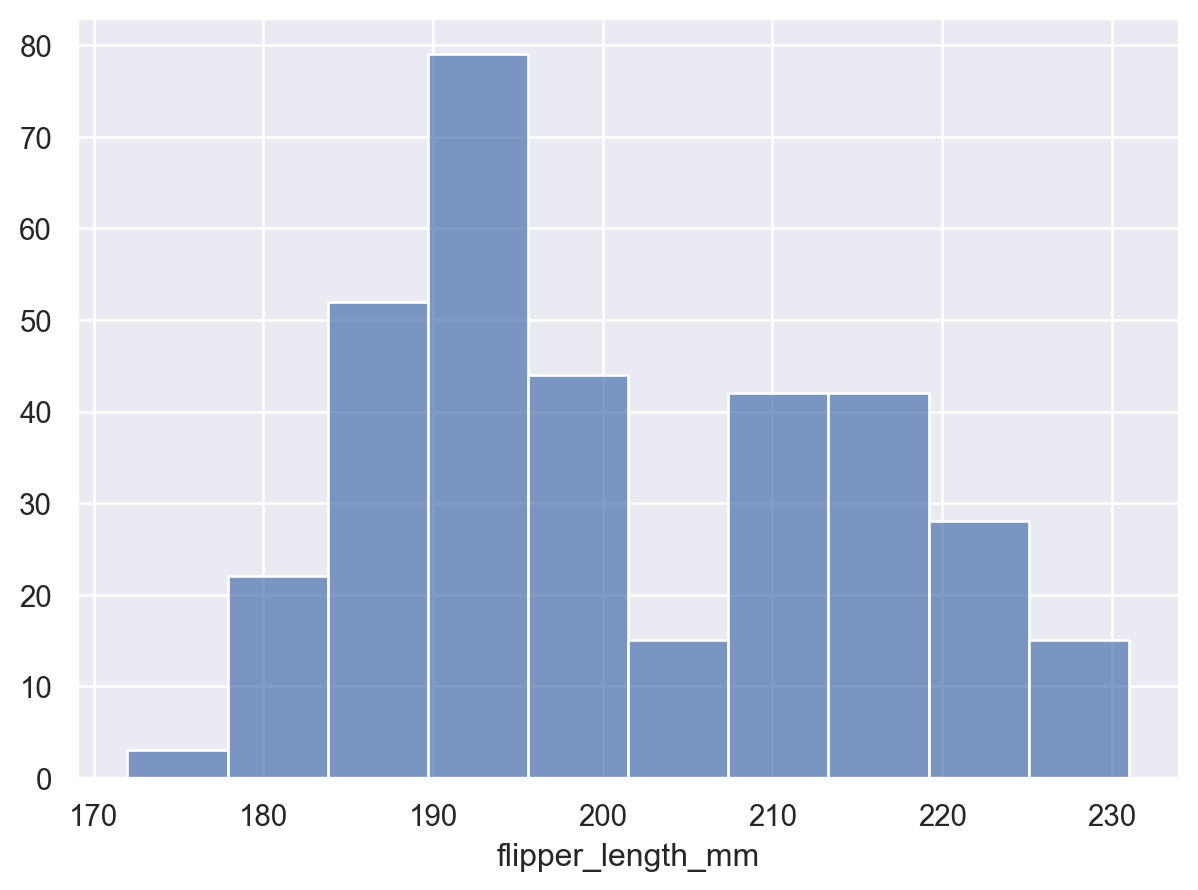

In [58]:
#7
"""Realizar un histograma de la cantidad de ping¨uinos en funci´on del tama˜no del ala 
(variable : flipper_length_mm). A partir del gr´afico, estimar el valor m´ınimo, m´aximo, la media y la
mediana. Verificar sus estimaciones utilizando los comandos apropiados."""


histoPinguinosPorAla =(
                         so.Plot( penguins , x = "flipper_length_mm") #color = "sex"
                                .add(so.Bars() , so.Hist() ) #si pongo so.Bar sin 's' se me arma pero no todo juntito
        
                        )
histoPinguinosPorAla

In [67]:
"""
minimo = unos 3 pinguinos tienen entre 170 y 180 mm
maximo = unos 79 pinguinos tienen entre 190 y 200 mm 
media = si la media es aprox 48 pinguinos, la media tiene entre 180 y 190 mm
mediana = para mi son los 42 que tienen entre 210 y 220 mm """
PxAla = penguins.groupby("flipper_length_mm").size()
display(PxAla.min())
display(PxAla.max())
display((PxAla.sum()/PxAla.nunique()))
display(PxAla.mean())
display(PxAla.median())

1

22

20.11764705882353

6.218181818181818

6.0

In [79]:
#8
"""Calcular distintos estad´ısticos de la variable bill_depth_mm (m´ınimo, m´aximo, media, ...)"""
min = penguins["bill_depth_mm"].min()
max = penguins["bill_depth_mm"].max()
media = penguins["bill_depth_mm"].mean()
mediana = penguins["bill_depth_mm"].median()
print( f" la minima es {min}")
print( f" la maxima es {max}")
print( f" la media es {media}")
print( f" la mediana es {mediana}")
#display(penguins.groupby("bill_depth_mm").size())
penguins["bill_depth_mm"].unique()
#penguins["bill_depth_mm"].nunique()

 la minima es 13.1
 la maxima es 21.5
 la media es 17.151169590643278
 la mediana es 17.3


bill_depth_mm
13.1    1
13.2    1
13.3    1
13.4    1
13.5    2
       ..
20.7    3
20.8    1
21.1    3
21.2    2
21.5    1
Length: 80, dtype: int64

array([18.7, 17.4, 18. ,  nan, 19.3, 20.6, 17.8, 19.6, 18.1, 20.2, 17.1,
       17.3, 17.6, 21.2, 21.1, 19. , 20.7, 18.4, 21.5, 18.3, 19.2, 17.2,
       18.9, 18.6, 17.9, 16.7, 17. , 20. , 18.5, 19.1, 19.7, 16.9, 18.8,
       17.7, 19.5, 17.5, 16.6, 18.2, 16.2, 19.4, 16.8, 16.1, 20.3, 16. ,
       16.5, 20.5, 19.8, 15.9, 20.1, 15.5, 19.9, 20.8, 16.4, 13.2, 16.3,
       14.1, 15.2, 14.5, 13.5, 14.6, 15.3, 13.4, 15.4, 13.7, 15.7, 15.1,
       14.3, 15.8, 13.1, 15. , 14.2, 14.8, 13.6, 13.9, 13.3, 14.4, 13.8,
       14.9, 15.6, 14. , 14.7])

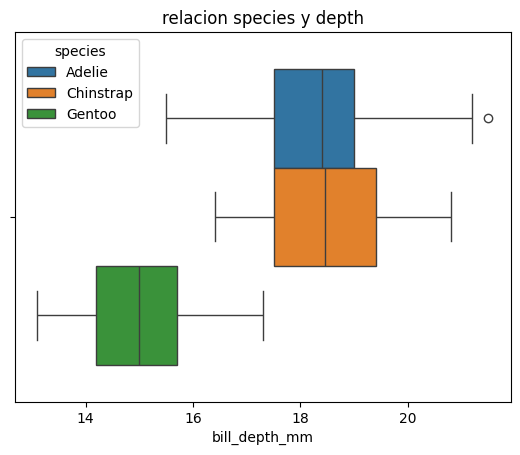

In [93]:
#(b) 
"""Seg´un lo observado en el ejercicio 4, ¿esos valores var´ıan seg´un la especie? ¿C´omo podemos
usar gr´aficos BoxPlot para para ver la relaci´on entre species y bill_depth_mm?"""
(
    sns.boxplot( penguins , x = "bill_depth_mm", hue = "species")

).set_title("relacion species y depth")
plt.show()

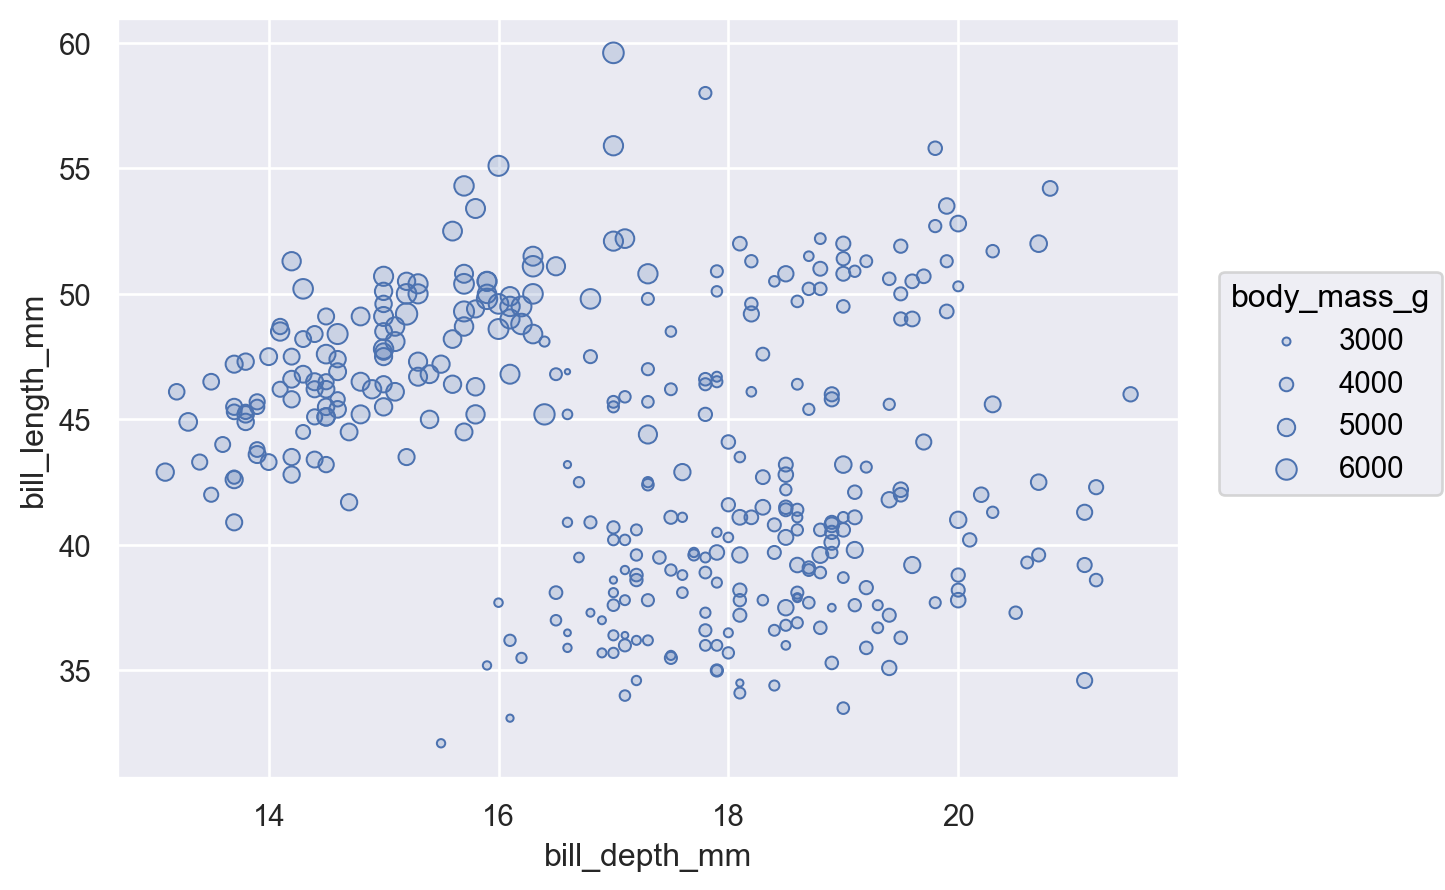

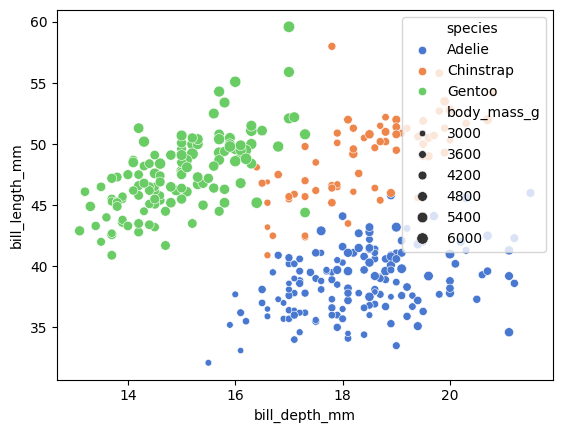

In [112]:
#sns.__version__
#9
"""Rehacer el scatter plot del ejercicio 4, modificando el tamaño de los puntos segun el peso
de cada pinguino, utilizando el parametro pointsize="???". ¿Que se observa?"""

sns.scatterplot( penguins , x = "bill_depth_mm" , y = "bill_length_mm" , size = "body_mass_g" , hue = "species" , palette = "muted" )

so.Plot( penguins , x = "bill_depth_mm" , y = "bill_length_mm").add(so.Dots(), pointsize = "body_mass_g")


In [113]:
#b) #utilizando el color para las especies, podemos notar que la especie Gentoo suele ser mas pesada boe.
#tal vez podria plantear alguna barra

In [114]:
#10) 
""" Ten´es datos de una encuesta realizada en distintas provincias de Argentina y quer´es saber
cu´antas personas respondieron a la encuesta en cada provincia. ¿Hac´es un gr´afico de l´ıneas, de
dispersi´on (scatter), histograma o un gr´afico de barras (bar plot)? Hac´e a mano en tu cuaderno
c´omo esper´as que se vea el gr´afico."""


' Ten´es datos de una encuesta realizada en distintas provincias de Argentina y quer´es saber\ncu´antas personas respondieron a la encuesta en cada provincia. ¿Hac´es un gr´afico de l´ıneas, de\ndispersi´on (scatter), histograma o un gr´afico de barras (bar plot)? Hac´e a mano en tu cuaderno\nc´omo esper´as que se vea el gr´afico.'

In [115]:
#11)
"""Est´as estudiando la relaci´on entre altura y peso de las personas. Ten´es un data-set que tiene
como variables la edad, sexo y peso de cada persona. Si quer´es describir estas variables por
separado, ¿qu´e gr´afico har´ıas para cada una? ¿y si quer´es visualizar la relaci´on entre peso y
altura? Hac´e a mano en tu cuaderno c´omo esper´as que se vea el gr´afico."""

'Est´as estudiando la relaci´on entre altura y peso de las personas. Ten´es un data-set que tiene\ncomo variables la edad, sexo y peso de cada persona. Si quer´es describir estas variables por\nseparado, ¿qu´e gr´afico har´ıas para cada una? ¿y si quer´es visualizar la relaci´on entre peso y\naltura? Hac´e a mano en tu cuaderno c´omo esper´as que se vea el gr´afico.'

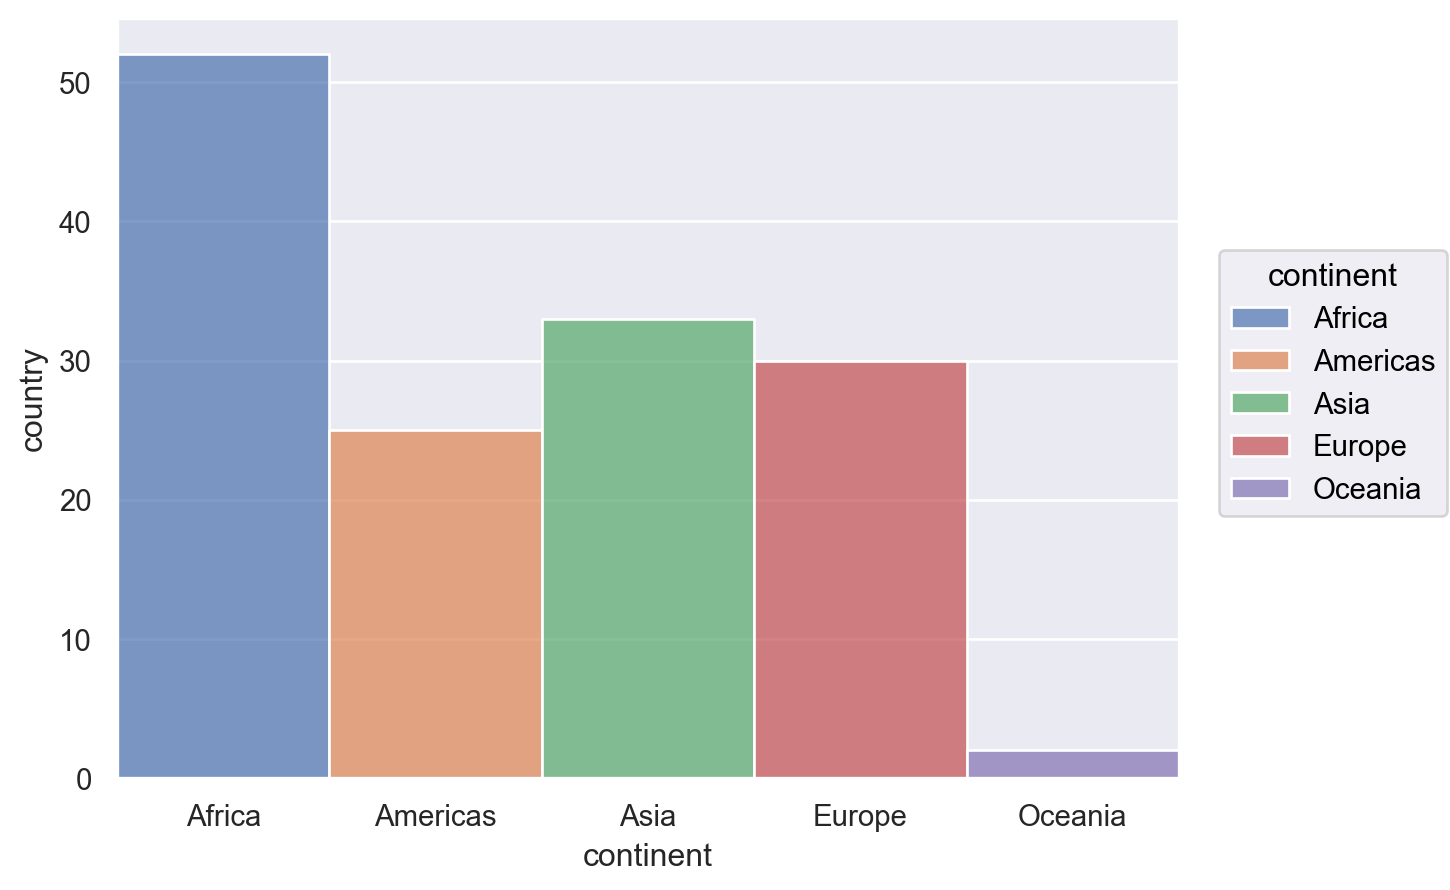

In [133]:
#12)
"""Hace un grafico de barras que muestre la cantidad de paıses hay en cada continente segun los
datos de gapminder.
(a) ¿Como podemos hacerlo calculando primero las cantidades y llamando a .add(so.Bar())?
(b) ¿Como podemos hacerlo utilizando so.Hist() para calcular las cantidades?"""

from gapminder import gapminder

columnaDatos = gapminder.groupby("continent")["country"].nunique() #de esta forma si me los conta sin repeticion!
#columnaDatos

so.Plot( x = columnaDatos.index , y = columnaDatos , color = columnaDatos.index ).add(so.Bars())

    

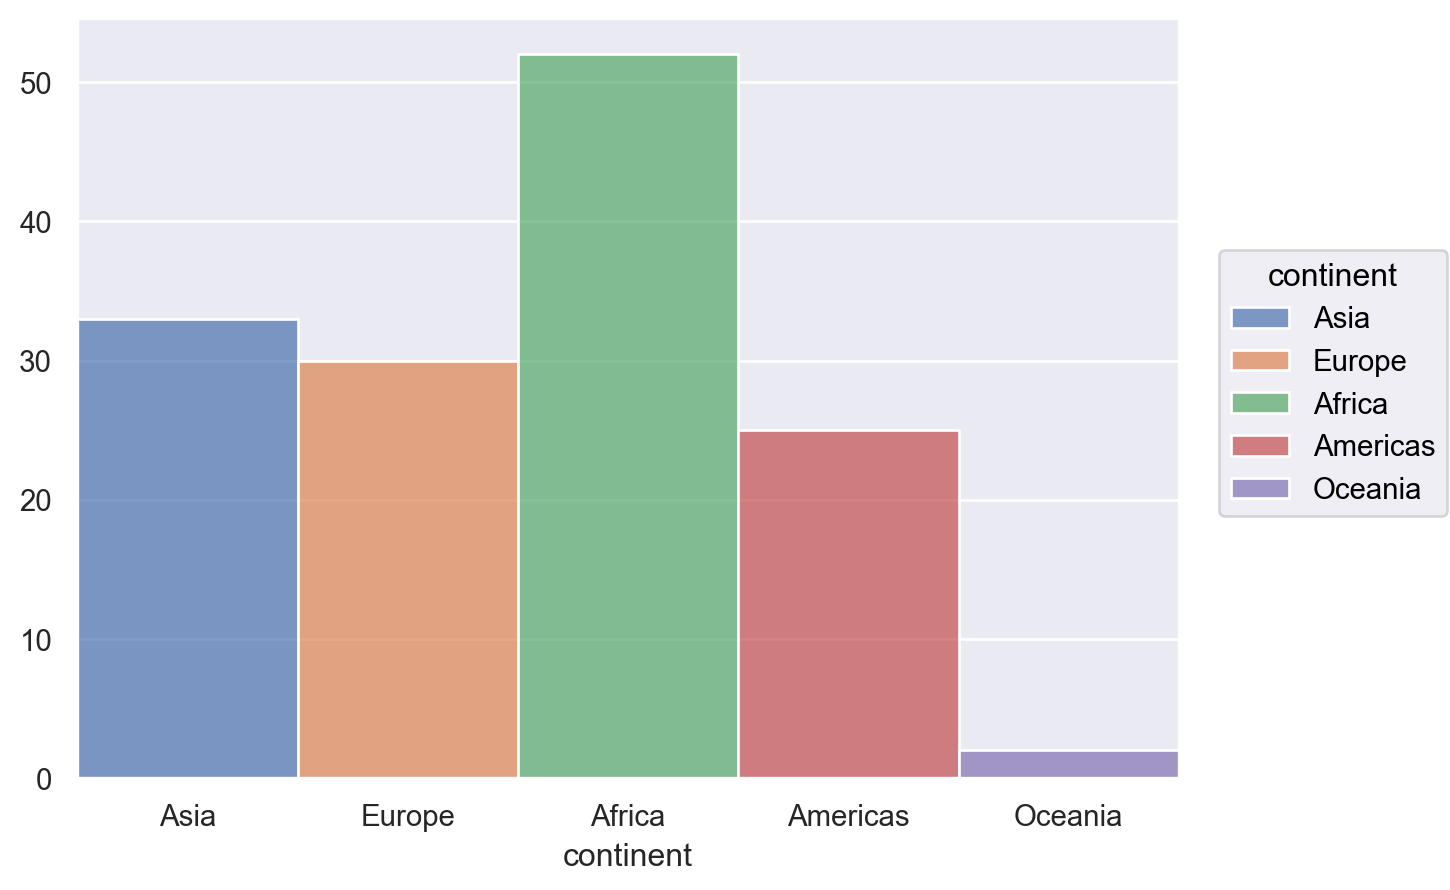

In [138]:
#b , filtro las repeticiones usando las de solo un año
datos2007 = gapminder[gapminder["year"] == 2007]
so.Plot( datos2007 , x = "continent" ).add( so.Bars(), so.Hist(), color = "continent")

<Axes: xlabel='continent', ylabel='lifeExp'>

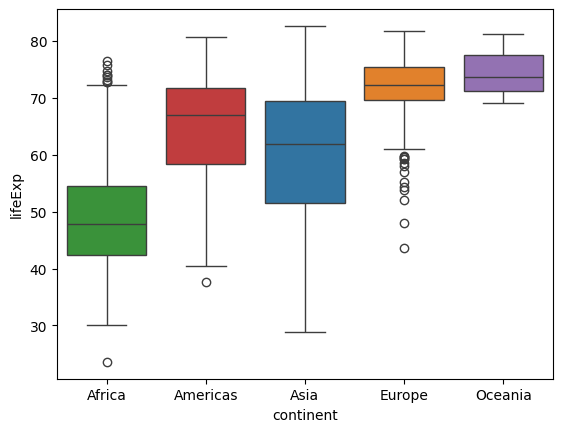

In [141]:
#13)
"""Queres investigar como varıa la expectativa de vida entre los continentes. Para eso uso boxplots. Completar el siguiente"""

sns.boxplot( gapminder , x = "continent" , y = "lifeExp" , order = sorted(gapminder["continent"]) , hue = "continent")

#no entendí bien que hacer sorted porque fijo el orden literalmente alfabeticamente pero bueno!

